# Exploring Dandiset 001174: Calcium Imaging in Macaques

This notebook provides an exploratory analysis of Dandiset 001174, which examines calcium imaging data in the supplementary motor area (SMA) and primary motor areas (M1) of macaques.

**Note:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This dataset focuses on the study of motor cortices in non-human primates to enhance our understanding of human motor control. Calcium imaging was used to study projection neurons during various conditions, including rest and task engagement.

## Summary of the Notebook

The notebook will cover:
- Loading the Dandiset.
- Visualizing the first frame of one-photon imaging data.
- Analyzing and visualizing Event Amplitude data for patterns.

## Required Packages
The following Python packages are required to run the notebook. Ensure they are already installed:
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pynwb
import h5py
import remfile

## Loading the Dandiset using DANDI API

In [2]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## One-Photon Imaging Data
We will examine the first frame of imaging data to get a basic overview of its structure.

Text(0.5, 1.0, 'First Frame of OnePhotonSeries')

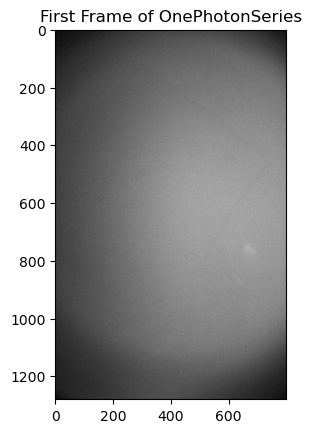

In [3]:
# Load NWB file for analysis
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Plot the first frame
one_photon_data = nwb.acquisition['OnePhotonSeries'].data
first_frame = one_photon_data[0, :, :]

plt.imshow(first_frame, cmap='gray')
plt.title('First Frame of OnePhotonSeries')

## Event Amplitude Analysis
The Event Amplitude provides valuable insights into fluorescence changes across different units.

Text(0, 0.5, 'Amplitude (fluorescence)')

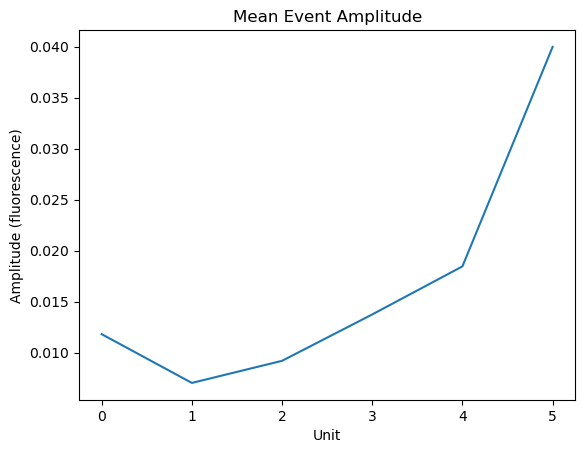

In [4]:
event_amplitude_data = nwb.processing['ophys'].data_interfaces['EventAmplitude'].data
mean_event_amp = np.mean(event_amplitude_data, axis=0)

plt.figure()
plt.plot(mean_event_amp)
plt.title('Mean Event Amplitude')
plt.xlabel('Unit')
plt.ylabel('Amplitude (fluorescence)')

## Summary and Future Directions

This notebook provided a basic exploration of key datasets within Dandiset 001174. Future analysis could explore more detailed trends in neuronal activation sequences and cross-condition comparisons.